## *Football Players' Transfer Fee Prediction*

 *This dataset includes basic information such as age, height, playing position, as well as professional statistics like goal scoring, assists (in 2 season 2021-2022 and 2022-2023), injuries, along with total individual and team awards in their career.* <br>

 This project is to create a model which predict a value of a football player transfer's fee

#### 1.Data Exploration

In [42]:
#import some iportant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*Have a look at the dataset*

In [43]:
df = pd.read_csv("final_data.csv")
display(df.head())

print("\033[1m The dataset consists of {} features and {} samples.\033[0m".format(df.shape[1], df.shape[0]))

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


 The dataset consists of 22 features and 10754 samples.


*See the data type of all features of this dataset*

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [45]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### 2. Exploratory Data Analysis

Features: "player", "team" and "name" would be delete from this dataset to make data for prediction model better

In [47]:
df = df.iloc[:,3:]

*We devide feature into numerical feature and categorical feature*

In [48]:
categorical_features = ["position", "position_encoded", "winger"]
numerical_features = [i for i in df.columns if i not in categorical_features]

*First, have a look at the correlation between those numerical features and the target feature*

<Axes: >

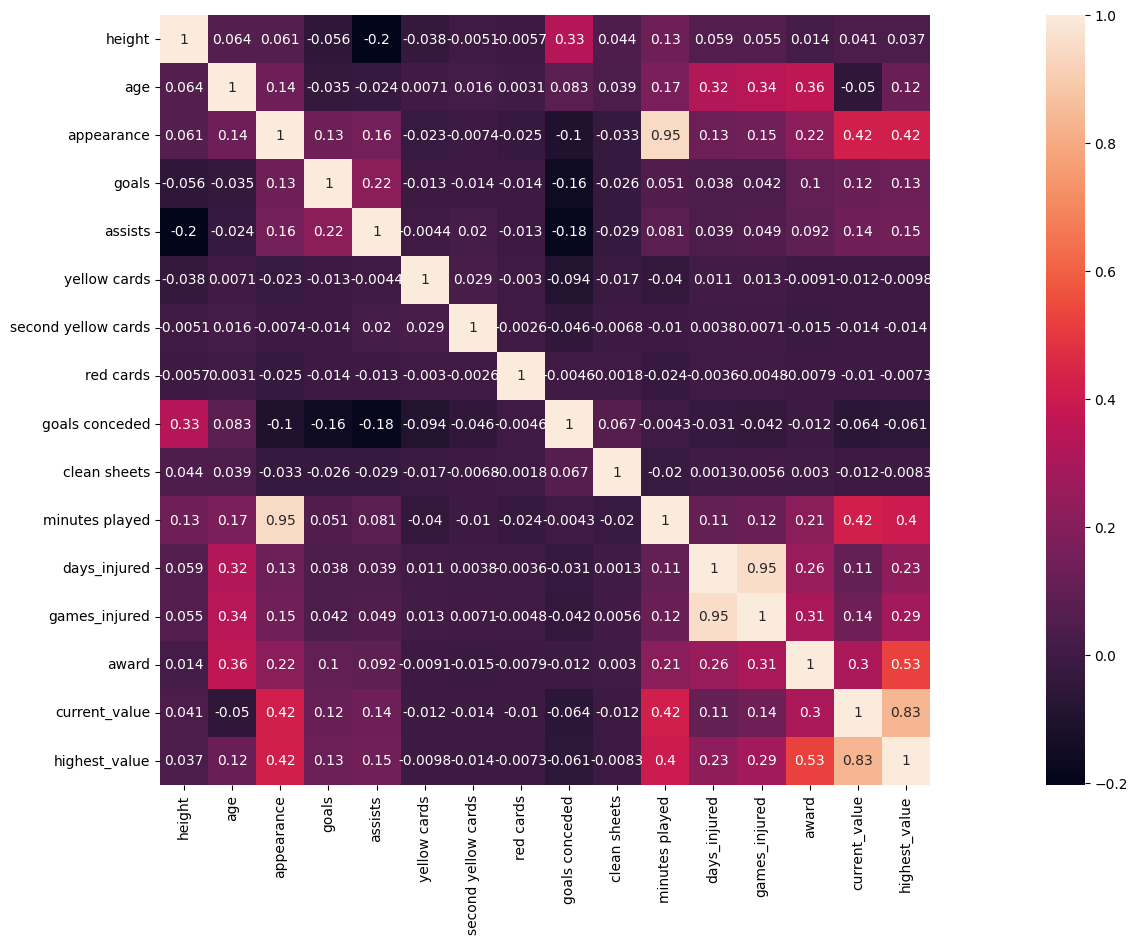

In [49]:
corr = df[numerical_features].corr()

f, ax = plt.subplots(figsize=(30,10))

sns.heatmap(corr, square=True, annot=True)

As we correlation map, show the target feature have a strong correlation with "appearance", "minutes played" ,"award" and "highest_value"

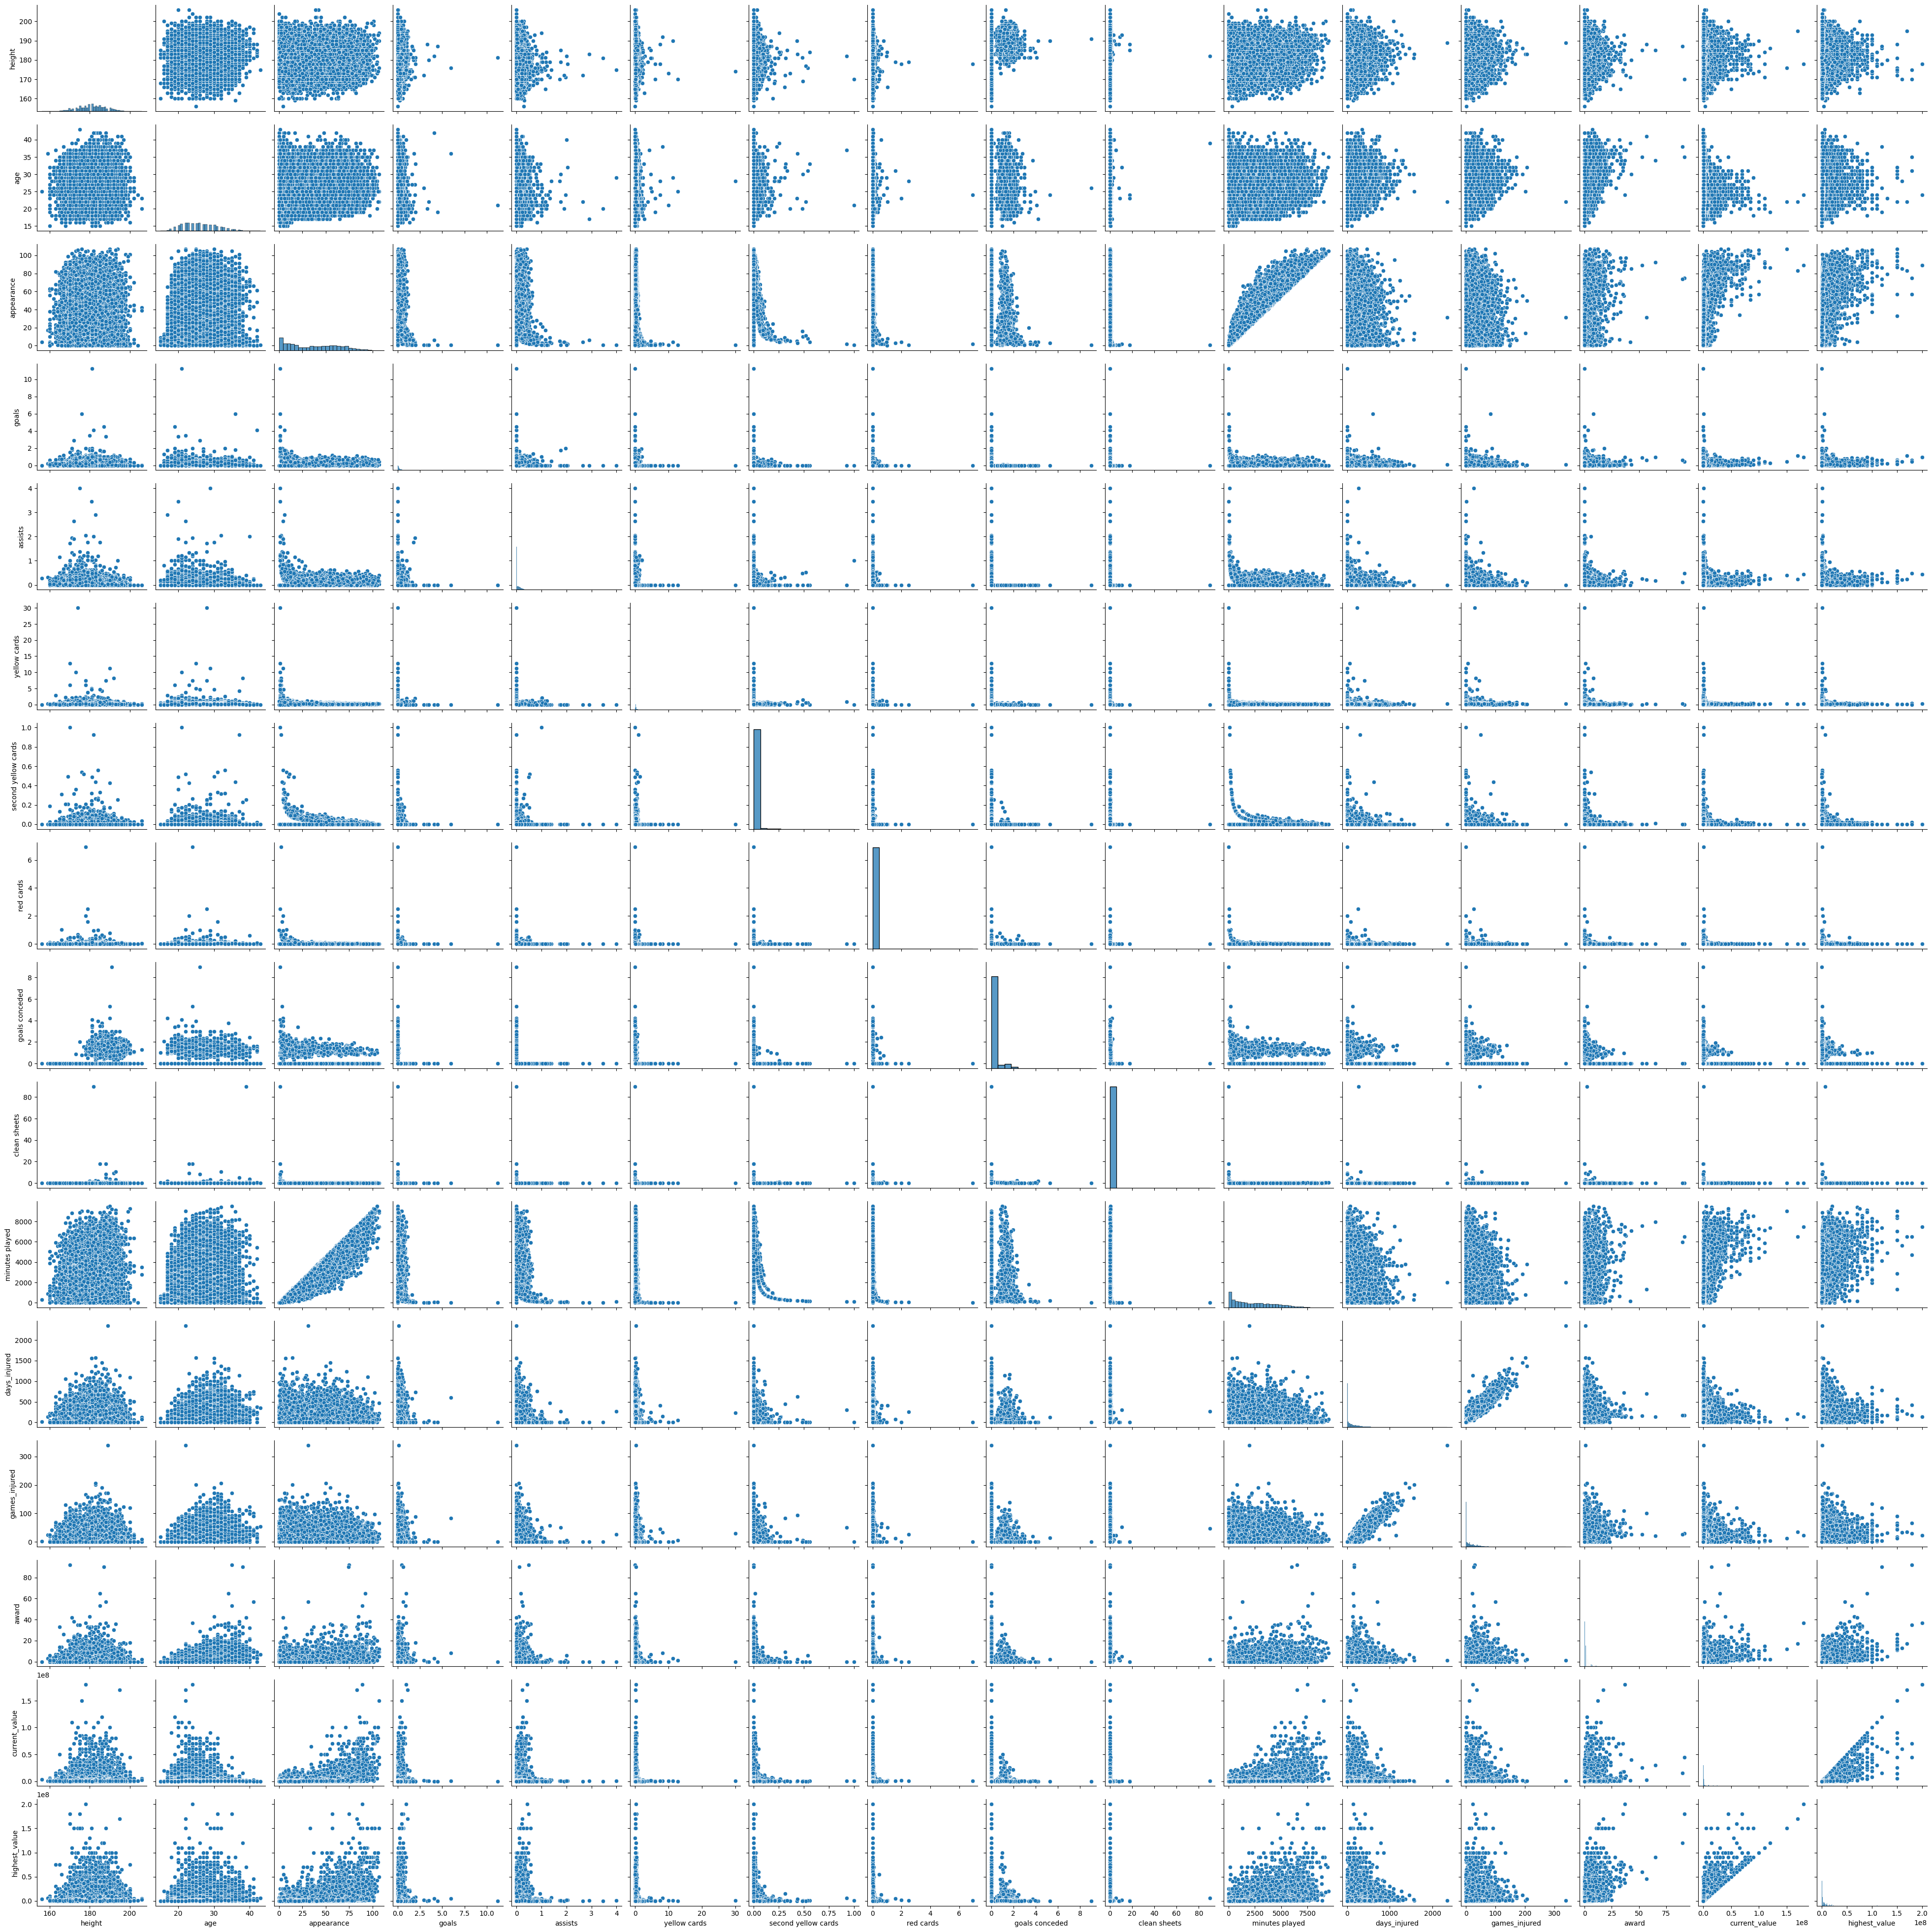

In [50]:
feature_list = ["appearance", "goals", "assists", "minutes played", "days_injured", "games_injured", "award", "highest_value", "current_value"]
sns.pairplot(data=df[numerical_features])

*There is no clear linear relationship between those numerical features*
Let's see the retationship between categorical features and target features

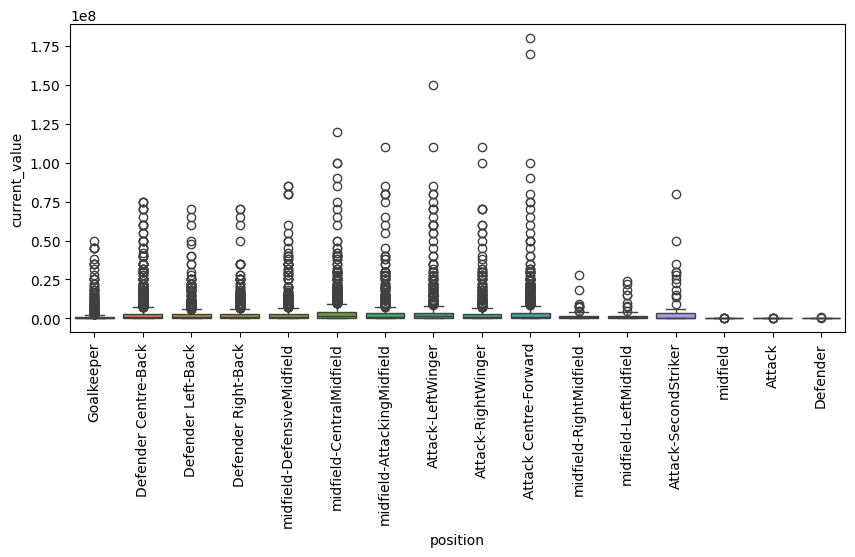

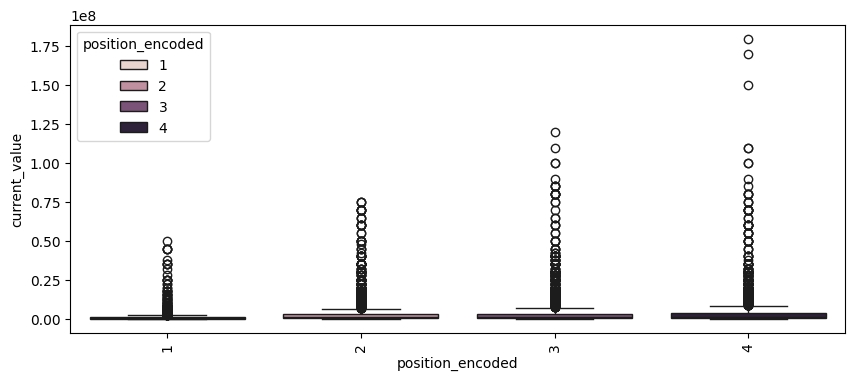

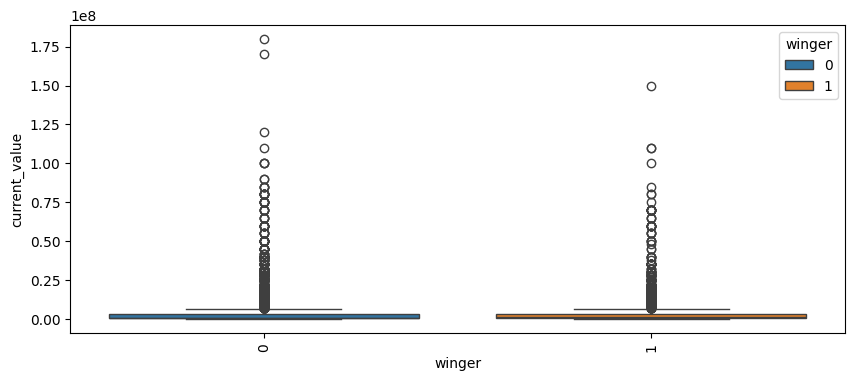

In [51]:
for i in categorical_features:
    plt.subplots(figsize=(10,4))
    sns.boxplot(data=df, x=i, y="current_value", hue=i)
    plt.xticks(rotation=90)
    plt.show()

*As we can see in the chart, the "position_encoded" feature affected strongly how the football player were avaluated. Because the "postion" and "positon_encoded" give the same information, i will only choose "position_encodeed" to train the model*  

#### 3. Preprocessing Data

*As we can see above, the relationship between "appearance" and "minutes played", the give the the same kind of infomation. So, i will create a feature to see a average time per appearance. As we knew that,geneally the better football player may play longer on the field*

In [52]:
df["average_minute"] = df["minutes played"] / df["appearance"]

Fill no value with 0

In [53]:
df["average_minute"] = df["average_minute"].fillna(0)

In [54]:
total_null = df.isnull().sum()
percel_null = total_null / df.isnull().count()
pd.concat([total_null, percel_null], axis=1, keys=["Number of null", "Percent"])

,Number of null,Percent
position,0,0.0
height,0,0.0
age,0,0.0
appearance,0,0.0
goals,0,0.0
assists,0,0.0
yellow cards,0,0.0
second yellow cards,0,0.0
red cards,0,0.0
goals conceded,0,0.0


*There's is no missing value in this dataset*

To evalute a football player, we can select some these features:<br>
* Physical atributes: age, height <br>
* Performcance: appearance, goals, assists, average_minute and position_encodeed <br>
* Current popolarity of a football player: award, heighest value



In [55]:
data_list = ["age","height", "goals conceded" ,"appearance", "goals", "assists", "average_minute", "award", "highest_value", "position_encoded", "current_value"]

Prepare training and testing dataset, get dummies and standalize the data

In [56]:
X = df[data_list]
y = X.pop("current_value")

In [57]:
X = pd.get_dummies(X, columns=["position_encoded"])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [59]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [60]:
std = StandardScaler()
train_x_std = std.fit_transform(train_x)
test_x_std = std.transform(test_x)

#### 4.Model Prediction

 *Random Forest Regressor*

In [61]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()

RF_model.fit(train_x_std, train_y)
RF_prediction = RF_model.predict(test_x_std)

RF_score = metrics.r2_score(RF_prediction, test_y)
RF_mae_score = metrics.mean_absolute_error(RF_prediction, test_y)

print("R2 Score of this model is {:.2f}".format(RF_score))
print("MAE of this model is {}".format(RF_mae_score))

R2 Score of this model is 0.92
MAE of this model is 956940.7964053301


As the result, the model Score is about 0.92 and the mean absolute error is 956940